### Tensorflow

In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [11]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0,2])
X_data = iris.data[idx, 0:2]
y_data = (iris.target[idx]/2)[:, np.newaxis]

In [46]:
np.random.seed(0)
w = tf.Variable(1e-3 * np.random.randn(2, 1))
b = tf.Variable(1e-3 * np.random.randn(1)[0])
z = 1/(1+tf.exp(-tf.matmul(X_data,w)+b))

zero = np.zeros(1, dtype=np.float64)[0] # float64 자료형의 0 값 생성 
cost = tf.reduce_sum(tf.multiply(y_data - z, y_data-z))
optimizer = tf.train.GradientDescentOptimizer(1e-2)
train = optimizer.minimize(cost)

sess = tf.Session()

w_summary = tf.summary.histogram("w", w)
b_summary = tf.summary.histogram("b", b)
z_summary = tf.summary.histogram("z", z)
cost_summary = tf.summary.histogram("cost", cost)
merged = tf.summary.merge([w_summary, b_summary, d_summary, cost_summary])

init = tf.global_variables_initializer()
sess.run(init)

writer = tf.summary.FileWriter("/home/dockeruser/logs", sess.graph)

for i in range(1000):
    sess.run(train)
    summary = sess.run(merged)
    writer.add_summary(summary, i)
    if i % 10 == 0:
        print("{:4d}: ".format(i), sess.run(cost))

   0:  26.36214985067344
  10:  16.361553328578587
  20:  24.464517289726416
  30:  9.212466520848537
  40:  40.614377080826
  50:  18.96645012712776
  60:  20.737816897325093
  70:  7.427864046733884
  80:  2.082873388973814
  90:  2.024423740917811
 100:  1.9713527454649133
 110:  1.922899437722453
 120:  1.8784634206494548
 130:  1.8375453684670342
 140:  1.7997264832532691
 150:  1.7646527841899857
 160:  1.732022950379854
 170:  1.7015788114758252
 180:  1.6730978353150823
 190:  1.6463871386358733
 200:  1.6212786714791496
 210:  1.5976253147237456
 220:  1.5752976943890795
 230:  1.5541815632472633
 240:  1.53417563493852
 250:  1.5151897816407667
 260:  1.497143525820259
 270:  1.4799647713902506
 280:  1.463588730944566
 290:  1.4479570144899472
 300:  1.4330168519132696
 310:  1.4187204267559586
 320:  1.405024303075624
 330:  1.3918889305135016
 340:  1.379278215350858
 350:  1.3671591474762343
 360:  1.3555014749112133
 370:  1.3442774189421145
 380:  1.3334614240457645
 39

In [36]:
y_pred = sess.run(tf.round(z))

In [37]:
y_pred

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [38]:
sess.close()

In [39]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[49,  1],
       [ 0, 50]], dtype=int64)

### Keras

In [47]:
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 193s 17us/step


In [48]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


In [52]:
%matplotlib inline

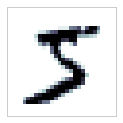

In [53]:
plt.figure(figsize=(2,2))
plt.imshow(X_train0[0], cmap=mpl.cm.bone_r)
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.show()

In [55]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [57]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [58]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0,10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [60]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=['accuracy'])

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [62]:
hist = model.fit(X_train, Y_train, epochs=30, batch_size=100, validation_data=(X_test, Y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 4s - loss: 0.1019 - acc: 0.2441 - val_loss: 0.0864 - val_acc: 0.3213
Epoch 2/30
 - 3s - loss: 0.0845 - acc: 0.3921 - val_loss: 0.0821 - val_acc: 0.4409
Epoch 3/30
 - 2s - loss: 0.0796 - acc: 0.4997 - val_loss: 0.0765 - val_acc: 0.5340
Epoch 4/30
 - 1s - loss: 0.0740 - acc: 0.5620 - val_loss: 0.0707 - val_acc: 0.5852
Epoch 5/30
 - 1s - loss: 0.0682 - acc: 0.6149 - val_loss: 0.0649 - val_acc: 0.6522
Epoch 6/30
 - 1s - loss: 0.0625 - acc: 0.6759 - val_loss: 0.0594 - val_acc: 0.6998
Epoch 7/30
 - 1s - loss: 0.0576 - acc: 0.7101 - val_loss: 0.0551 - val_acc: 0.7317
Epoch 8/30
 - 1s - loss: 0.0537 - acc: 0.7325 - val_loss: 0.0516 - val_acc: 0.7485
Epoch 9/30
 - 1s - loss: 0.0505 - acc: 0.7474 - val_loss: 0.0486 - val_acc: 0.7638
Epoch 10/30
 - 1s - loss: 0.0478 - acc: 0.7608 - val_loss: 0.0461 - val_acc: 0.7759
Epoch 11/30
 - 1s - loss: 0.0455 - acc: 0.7739 - val_loss: 0.0439 - val_acc: 0.7893
Epoch 12/30
 - 1s - loss: 0.0435 - 

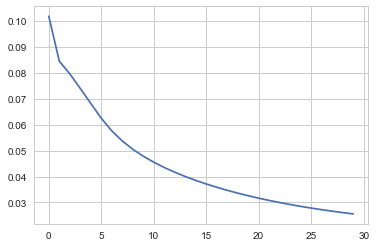

In [63]:
plt.plot(hist.history['loss'])
plt.show()

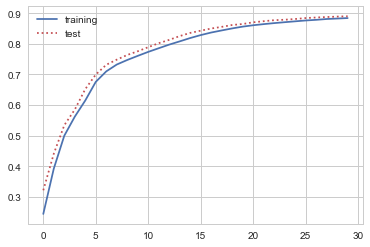

In [64]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [65]:
model.predict(X_test[:1, :])

array([[0.01766624, 0.01916048, 0.01319776, 0.02870264, 0.01252119,
        0.0572134 , 0.01232435, 0.9418628 , 0.00762763, 0.0553561 ]],
      dtype=float32)

In [66]:
model.predict_classes(X_test[:1, :], verbose=0)

array([7], dtype=int64)

#### Keras를 사용하여 iris 분류 문제를 해결하는 신경망을 구현하라.

In [184]:
X_train = iris.data
y_train = iris.target

In [185]:
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)

(150, 4) float64
(150,) int32


In [186]:
y_train[:5]

array([0, 0, 0, 0, 0])

In [187]:
y_train = np_utils.to_categorical(y_train, 3)

In [188]:
y_train.shape

(150, 3)

In [189]:
model_iris = Sequential()
model_iris.add(Dense(15, input_dim=4, activation="sigmoid"))
model_iris.add(Dense(3, activation="sigmoid"))
model_iris.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [190]:
model_iris.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 15)                75        
_________________________________________________________________
dense_31 (Dense)             (None, 3)                 48        
Total params: 123
Trainable params: 123
Non-trainable params: 0
_________________________________________________________________


In [193]:
hist = model_iris.fit(X_train, y_train, 
                 epochs=100, batch_size=5,
                 verbose=2)

Epoch 1/100
 - 0s - loss: 0.1084 - acc: 0.9200
Epoch 2/100
 - 0s - loss: 0.1078 - acc: 0.8800
Epoch 3/100
 - 0s - loss: 0.1061 - acc: 0.8400
Epoch 4/100
 - 0s - loss: 0.1040 - acc: 0.9067
Epoch 5/100
 - 0s - loss: 0.1029 - acc: 0.8067
Epoch 6/100
 - 0s - loss: 0.1030 - acc: 0.8733
Epoch 7/100
 - 0s - loss: 0.1017 - acc: 0.9067
Epoch 8/100
 - 0s - loss: 0.1003 - acc: 0.9200
Epoch 9/100
 - 0s - loss: 0.0990 - acc: 0.9133
Epoch 10/100
 - 0s - loss: 0.0986 - acc: 0.8667
Epoch 11/100
 - 0s - loss: 0.0967 - acc: 0.9267
Epoch 12/100
 - 0s - loss: 0.0952 - acc: 0.9400
Epoch 13/100
 - 0s - loss: 0.0947 - acc: 0.9267
Epoch 14/100
 - 0s - loss: 0.0941 - acc: 0.9333
Epoch 15/100
 - 0s - loss: 0.0908 - acc: 0.9133
Epoch 16/100
 - 0s - loss: 0.0924 - acc: 0.9133
Epoch 17/100
 - 0s - loss: 0.0896 - acc: 0.9533
Epoch 18/100
 - 0s - loss: 0.0884 - acc: 0.9067
Epoch 19/100
 - 0s - loss: 0.0875 - acc: 0.9600
Epoch 20/100
 - 0s - loss: 0.0862 - acc: 0.9467
Epoch 21/100
 - 0s - loss: 0.0844 - acc: 0.9467
E

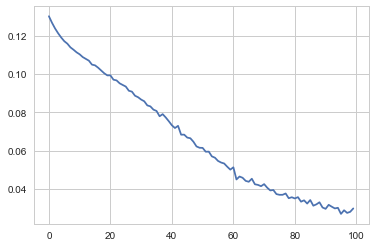

In [142]:
plt.plot(hist.history['loss'])
plt.show()

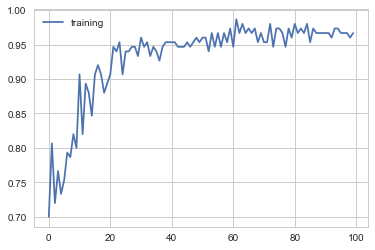

In [143]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.legend()
plt.show()

In [ ]:
X_train = iris.data
y_train = iris.target

In [ ]:
y_train = np_utils.to_categorical(y_train, 3)

In [ ]:
model_iris = Sequential()
model_iris.add(Dense(15, input_dim=4, activation="sigmoid"))
model_iris.add(Dense(3, activation="sigmoid"))
model_iris.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=["accuracy"])

In [ ]:
model_iris.summary()

In [ ]:
hist = model_iris.fit(X_train, y_train, 
                 epochs=10,
                 verbose=2)

In [ ]:
plt.plot(hist.history['loss'])
plt.show()

In [ ]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.legend()
plt.show()

In [ ]:
confusion_matrix(y_data, y_pred)

#### Keras를 사용하여 olivetti_faces 분류 문제를 해결하는 신경망을 구현하라.

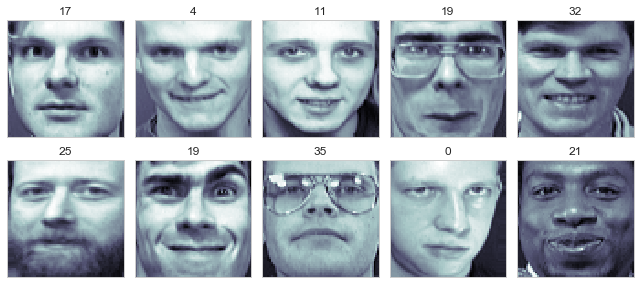

In [194]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, 
                                                    test_size=0.4, random_state=0)

In [196]:
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)
print(X_test.shape, X_test.dtype)
print(y_test.shape, y_test.dtype)

(240, 4096) float32
(240,) int32
(160, 4096) float32
(160,) int32


In [197]:
y_train[:5]

array([28, 13,  3, 37, 16])

In [198]:
Y_train = np_utils.to_categorical(y_train, 40)
Y_test = np_utils.to_categorical(y_test, 40)
Y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [261]:
np.random.seed(0)

model = Sequential()
model.add(Dense(550, input_dim=4096, activation="sigmoid"))
model.add(Dense(40, activation="sigmoid"))
model.compile(optimizer=SGD(lr=4), loss='mean_squared_error', metrics=["accuracy"])

In [262]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_63 (Dense)             (None, 550)               2253350   
_________________________________________________________________
dense_64 (Dense)             (None, 40)                22040     
Total params: 2,275,390
Trainable params: 2,275,390
Non-trainable params: 0
_________________________________________________________________


In [263]:
hist = model.fit(X_train, Y_train, 
                 epochs=1000, 
                 validation_data=(X_test, Y_test), 
                 verbose=2)

Train on 240 samples, validate on 160 samples
Epoch 1/1000
 - 3s - loss: 0.0599 - acc: 0.0292 - val_loss: 0.0247 - val_acc: 0.0125
Epoch 2/1000
 - 0s - loss: 0.0246 - acc: 0.0333 - val_loss: 0.0246 - val_acc: 0.0187
Epoch 3/1000
 - 0s - loss: 0.0246 - acc: 0.0333 - val_loss: 0.0246 - val_acc: 0.0187
Epoch 4/1000
 - 0s - loss: 0.0246 - acc: 0.0333 - val_loss: 0.0246 - val_acc: 0.0187
Epoch 5/1000
 - 0s - loss: 0.0246 - acc: 0.0375 - val_loss: 0.0246 - val_acc: 0.0063
Epoch 6/1000
 - 0s - loss: 0.0246 - acc: 0.0417 - val_loss: 0.0246 - val_acc: 0.0063
Epoch 7/1000
 - 0s - loss: 0.0246 - acc: 0.0375 - val_loss: 0.0246 - val_acc: 0.0187
Epoch 8/1000
 - 0s - loss: 0.0246 - acc: 0.0458 - val_loss: 0.0246 - val_acc: 0.0063
Epoch 9/1000
 - 0s - loss: 0.0245 - acc: 0.0375 - val_loss: 0.0246 - val_acc: 0.0187
Epoch 10/1000
 - 0s - loss: 0.0245 - acc: 0.0417 - val_loss: 0.0246 - val_acc: 0.0063
Epoch 11/1000
 - 0s - loss: 0.0245 - acc: 0.0500 - val_loss: 0.0246 - val_acc: 0.0250
Epoch 12/1000
 - 

Epoch 96/1000
 - 0s - loss: 0.0237 - acc: 0.2000 - val_loss: 0.0246 - val_acc: 0.0437
Epoch 97/1000
 - 0s - loss: 0.0237 - acc: 0.1667 - val_loss: 0.0246 - val_acc: 0.0375
Epoch 98/1000
 - 0s - loss: 0.0237 - acc: 0.1875 - val_loss: 0.0245 - val_acc: 0.0437
Epoch 99/1000
 - 0s - loss: 0.0237 - acc: 0.1333 - val_loss: 0.0244 - val_acc: 0.0500
Epoch 100/1000
 - 0s - loss: 0.0236 - acc: 0.2042 - val_loss: 0.0244 - val_acc: 0.0688
Epoch 101/1000
 - 0s - loss: 0.0236 - acc: 0.1958 - val_loss: 0.0244 - val_acc: 0.0563
Epoch 102/1000
 - 0s - loss: 0.0236 - acc: 0.1625 - val_loss: 0.0245 - val_acc: 0.0500
Epoch 103/1000
 - 0s - loss: 0.0236 - acc: 0.1917 - val_loss: 0.0244 - val_acc: 0.0500
Epoch 104/1000
 - 0s - loss: 0.0236 - acc: 0.1833 - val_loss: 0.0244 - val_acc: 0.0563
Epoch 105/1000
 - 0s - loss: 0.0236 - acc: 0.2042 - val_loss: 0.0245 - val_acc: 0.0563
Epoch 106/1000
 - 0s - loss: 0.0236 - acc: 0.1667 - val_loss: 0.0244 - val_acc: 0.0688
Epoch 107/1000
 - 0s - loss: 0.0235 - acc: 0.17

Epoch 191/1000
 - 0s - loss: 0.0190 - acc: 0.4167 - val_loss: 0.0225 - val_acc: 0.2500
Epoch 192/1000
 - 0s - loss: 0.0189 - acc: 0.4167 - val_loss: 0.0228 - val_acc: 0.1688
Epoch 193/1000
 - 0s - loss: 0.0189 - acc: 0.4125 - val_loss: 0.0228 - val_acc: 0.1500
Epoch 194/1000
 - 0s - loss: 0.0188 - acc: 0.4250 - val_loss: 0.0225 - val_acc: 0.1875
Epoch 195/1000
 - 0s - loss: 0.0186 - acc: 0.4292 - val_loss: 0.0225 - val_acc: 0.2000
Epoch 196/1000
 - 0s - loss: 0.0186 - acc: 0.4333 - val_loss: 0.0222 - val_acc: 0.2250
Epoch 197/1000
 - 0s - loss: 0.0185 - acc: 0.4333 - val_loss: 0.0229 - val_acc: 0.2000
Epoch 198/1000
 - 0s - loss: 0.0185 - acc: 0.4500 - val_loss: 0.0223 - val_acc: 0.1938
Epoch 199/1000
 - 0s - loss: 0.0185 - acc: 0.4417 - val_loss: 0.0227 - val_acc: 0.1812
Epoch 200/1000
 - 0s - loss: 0.0183 - acc: 0.4542 - val_loss: 0.0224 - val_acc: 0.2188
Epoch 201/1000
 - 0s - loss: 0.0183 - acc: 0.4708 - val_loss: 0.0223 - val_acc: 0.2125
Epoch 202/1000
 - 0s - loss: 0.0182 - acc: 

 - 0s - loss: 0.0127 - acc: 0.7292 - val_loss: 0.0180 - val_acc: 0.4750
Epoch 286/1000
 - 0s - loss: 0.0126 - acc: 0.7583 - val_loss: 0.0179 - val_acc: 0.4750
Epoch 287/1000
 - 0s - loss: 0.0125 - acc: 0.7333 - val_loss: 0.0183 - val_acc: 0.4562
Epoch 288/1000
 - 0s - loss: 0.0124 - acc: 0.7250 - val_loss: 0.0179 - val_acc: 0.5312
Epoch 289/1000
 - 0s - loss: 0.0124 - acc: 0.7375 - val_loss: 0.0180 - val_acc: 0.4938
Epoch 290/1000
 - 0s - loss: 0.0123 - acc: 0.7458 - val_loss: 0.0179 - val_acc: 0.5000
Epoch 291/1000
 - 0s - loss: 0.0122 - acc: 0.7708 - val_loss: 0.0180 - val_acc: 0.4875
Epoch 292/1000
 - 0s - loss: 0.0121 - acc: 0.7792 - val_loss: 0.0181 - val_acc: 0.4875
Epoch 293/1000
 - 0s - loss: 0.0121 - acc: 0.7542 - val_loss: 0.0176 - val_acc: 0.5188
Epoch 294/1000
 - 0s - loss: 0.0120 - acc: 0.7792 - val_loss: 0.0179 - val_acc: 0.5125
Epoch 295/1000
 - 0s - loss: 0.0119 - acc: 0.7833 - val_loss: 0.0175 - val_acc: 0.5062
Epoch 296/1000
 - 0s - loss: 0.0119 - acc: 0.7792 - val_lo

Epoch 380/1000
 - 0s - loss: 0.0075 - acc: 0.8875 - val_loss: 0.0140 - val_acc: 0.6375
Epoch 381/1000
 - 0s - loss: 0.0075 - acc: 0.9000 - val_loss: 0.0138 - val_acc: 0.6625
Epoch 382/1000
 - 0s - loss: 0.0074 - acc: 0.8917 - val_loss: 0.0137 - val_acc: 0.6438
Epoch 383/1000
 - 0s - loss: 0.0073 - acc: 0.9042 - val_loss: 0.0136 - val_acc: 0.6813
Epoch 384/1000
 - 0s - loss: 0.0073 - acc: 0.8917 - val_loss: 0.0139 - val_acc: 0.6375
Epoch 385/1000
 - 0s - loss: 0.0072 - acc: 0.8958 - val_loss: 0.0137 - val_acc: 0.6687
Epoch 386/1000
 - 0s - loss: 0.0072 - acc: 0.8958 - val_loss: 0.0138 - val_acc: 0.6438
Epoch 387/1000
 - 0s - loss: 0.0073 - acc: 0.8875 - val_loss: 0.0134 - val_acc: 0.6875
Epoch 388/1000
 - 0s - loss: 0.0072 - acc: 0.9042 - val_loss: 0.0134 - val_acc: 0.6750
Epoch 389/1000
 - 0s - loss: 0.0071 - acc: 0.9083 - val_loss: 0.0139 - val_acc: 0.6500
Epoch 390/1000
 - 0s - loss: 0.0071 - acc: 0.9042 - val_loss: 0.0133 - val_acc: 0.7188
Epoch 391/1000
 - 0s - loss: 0.0070 - acc: 

 - 0s - loss: 0.0043 - acc: 0.9667 - val_loss: 0.0103 - val_acc: 0.8063
Epoch 475/1000
 - 0s - loss: 0.0043 - acc: 0.9708 - val_loss: 0.0108 - val_acc: 0.7562
Epoch 476/1000
 - 0s - loss: 0.0043 - acc: 0.9750 - val_loss: 0.0106 - val_acc: 0.8063
Epoch 477/1000
 - 0s - loss: 0.0043 - acc: 0.9708 - val_loss: 0.0103 - val_acc: 0.7875
Epoch 478/1000
 - 0s - loss: 0.0043 - acc: 0.9833 - val_loss: 0.0101 - val_acc: 0.7875
Epoch 479/1000
 - 0s - loss: 0.0042 - acc: 0.9792 - val_loss: 0.0103 - val_acc: 0.8000
Epoch 480/1000
 - 0s - loss: 0.0042 - acc: 0.9792 - val_loss: 0.0103 - val_acc: 0.7875
Epoch 481/1000
 - 0s - loss: 0.0042 - acc: 0.9708 - val_loss: 0.0104 - val_acc: 0.7875
Epoch 482/1000
 - 0s - loss: 0.0041 - acc: 0.9750 - val_loss: 0.0100 - val_acc: 0.8000
Epoch 483/1000
 - 0s - loss: 0.0041 - acc: 0.9708 - val_loss: 0.0100 - val_acc: 0.7875
Epoch 484/1000
 - 0s - loss: 0.0040 - acc: 0.9708 - val_loss: 0.0102 - val_acc: 0.8187
Epoch 485/1000
 - 0s - loss: 0.0041 - acc: 0.9833 - val_lo

Epoch 569/1000
 - 0s - loss: 0.0023 - acc: 0.9917 - val_loss: 0.0081 - val_acc: 0.8688
Epoch 570/1000
 - 0s - loss: 0.0024 - acc: 0.9958 - val_loss: 0.0084 - val_acc: 0.8750
Epoch 571/1000
 - 0s - loss: 0.0023 - acc: 0.9917 - val_loss: 0.0081 - val_acc: 0.8812
Epoch 572/1000
 - 0s - loss: 0.0023 - acc: 0.9958 - val_loss: 0.0083 - val_acc: 0.8375
Epoch 573/1000
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0081 - val_acc: 0.8688
Epoch 574/1000
 - 0s - loss: 0.0023 - acc: 0.9917 - val_loss: 0.0081 - val_acc: 0.8688
Epoch 575/1000
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0090 - val_acc: 0.8063
Epoch 576/1000
 - 0s - loss: 0.0023 - acc: 0.9917 - val_loss: 0.0080 - val_acc: 0.8750
Epoch 577/1000
 - 0s - loss: 0.0022 - acc: 1.0000 - val_loss: 0.0080 - val_acc: 0.8750
Epoch 578/1000
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0083 - val_acc: 0.8500
Epoch 579/1000
 - 0s - loss: 0.0022 - acc: 0.9958 - val_loss: 0.0078 - val_acc: 0.8688
Epoch 580/1000
 - 0s - loss: 0.0022 - acc: 

 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.8938
Epoch 664/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.8938
Epoch 665/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.8812
Epoch 666/1000
 - 0s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.8875
Epoch 667/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 0.8750
Epoch 668/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.9000
Epoch 669/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.9000
Epoch 670/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.8750
Epoch 671/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0067 - val_acc: 0.8812
Epoch 672/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0068 - val_acc: 0.8938
Epoch 673/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0066 - val_acc: 0.8938
Epoch 674/1000
 - 0s - loss: 0.0013 - acc: 1.0000 - val_lo

 - 0s - loss: 8.7604e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.9062
Epoch 757/1000
 - 0s - loss: 8.6084e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.8938
Epoch 758/1000
 - 0s - loss: 8.5929e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.9062
Epoch 759/1000
 - 0s - loss: 8.6037e-04 - acc: 1.0000 - val_loss: 0.0062 - val_acc: 0.8812
Epoch 760/1000
 - 0s - loss: 8.8955e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.9125
Epoch 761/1000
 - 0s - loss: 8.6664e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.9000
Epoch 762/1000
 - 0s - loss: 8.5338e-04 - acc: 1.0000 - val_loss: 0.0061 - val_acc: 0.8938
Epoch 763/1000
 - 0s - loss: 8.5416e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9062
Epoch 764/1000
 - 0s - loss: 8.4415e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9062
Epoch 765/1000
 - 0s - loss: 8.4462e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9062
Epoch 766/1000
 - 1s - loss: 8.4739e-04 - acc: 1.0000 - val_loss: 0.0060 - val_acc: 0.9187
Epoch 767/1000

Epoch 847/1000
 - 0s - loss: 6.2115e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9187
Epoch 848/1000
 - 0s - loss: 6.2803e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9187
Epoch 849/1000
 - 0s - loss: 6.1562e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9187
Epoch 850/1000
 - 0s - loss: 6.2127e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9250
Epoch 851/1000
 - 0s - loss: 6.1209e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 0.9187
Epoch 852/1000
 - 0s - loss: 6.0896e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 0.9250
Epoch 853/1000
 - 0s - loss: 6.1408e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 0.9125
Epoch 854/1000
 - 0s - loss: 6.0694e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 0.9062
Epoch 855/1000
 - 0s - loss: 5.9955e-04 - acc: 1.0000 - val_loss: 0.0059 - val_acc: 0.9062
Epoch 856/1000
 - 0s - loss: 6.1511e-04 - acc: 1.0000 - val_loss: 0.0058 - val_acc: 0.9062
Epoch 857/1000
 - 0s - loss: 6.0440e-04 - acc: 1.0000 - val_loss: 0.0057 - val_acc: 0.9000

 - 0s - loss: 4.7787e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9125
Epoch 938/1000
 - 0s - loss: 4.7307e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 939/1000
 - 0s - loss: 4.7532e-04 - acc: 1.0000 - val_loss: 0.0056 - val_acc: 0.9187
Epoch 940/1000
 - 0s - loss: 4.7253e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9125
Epoch 941/1000
 - 0s - loss: 4.6724e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9313
Epoch 942/1000
 - 0s - loss: 4.6845e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9125
Epoch 943/1000
 - 0s - loss: 4.6831e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 944/1000
 - 0s - loss: 4.6812e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9250
Epoch 945/1000
 - 0s - loss: 4.6494e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9313
Epoch 946/1000
 - 0s - loss: 4.6544e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 947/1000
 - 0s - loss: 4.6412e-04 - acc: 1.0000 - val_loss: 0.0055 - val_acc: 0.9187
Epoch 948/1000

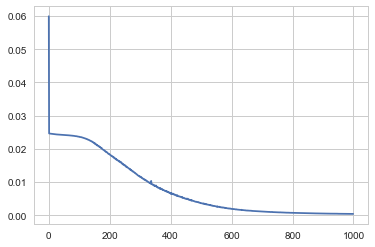

In [264]:
plt.plot(hist.history['loss'])
plt.show()

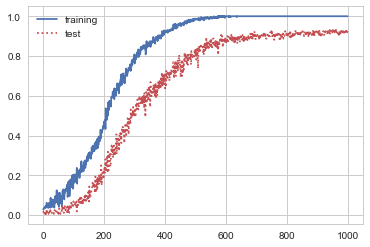

In [265]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

In [266]:
model.predict(X_test[:1, :])

array([[2.9332289e-03, 4.2206873e-03, 9.4418274e-03, 1.2273858e-03,
        7.8413785e-03, 5.5112130e-05, 5.9779471e-04, 6.8902448e-03,
        2.2289912e-04, 2.7737275e-04, 3.1388707e-03, 1.7991360e-02,
        1.9254243e-02, 9.4764161e-01, 3.5427758e-04, 6.9189562e-05,
        2.3544030e-03, 1.4706328e-02, 2.3664926e-04, 9.6162461e-05,
        4.6952427e-04, 1.6370916e-03, 4.3908898e-03, 8.8527440e-06,
        1.2280538e-02, 7.5414084e-02, 4.2362943e-02, 3.7738874e-03,
        3.6052402e-04, 1.5819665e-04, 8.1269760e-03, 2.8681481e-02,
        1.1920214e-04, 2.4341678e-03, 5.6286628e-04, 6.6070919e-05,
        5.5966377e-03, 2.2304156e-03, 3.9547001e-04, 3.6436053e-05]],
      dtype=float32)

In [267]:
model.predict_classes(X_test[:1, :], verbose=0)

array([13], dtype=int64)